In [1]:
# Import modules
import json
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# Set a path
json_data_path = './data/cat_dog_rabbit_annotation_json.json'

# Load JSON
with open(json_data_path, 'r', encoding='utf-8') as j:
    json_data = json.load(j)
    
print(json_data)

{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}, {'id': 3, 'name': 'rabbit', 'supercategory': ''}, {'id': 4, 'name': 'guinea pig', 'supercategory': ''}], 'images': [{'id': 1, 'width': 484, 'height': 277, 'file_name': 'cat_dog_rabbit.PNG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [[282.0, 66.0, 278.0, 66.0, 267.0, 76.0, 258.0, 78.0, 230.0, 78.0, 224.0, 76.0, 211.0, 66.0, 207.0, 68.0, 206.0, 110.0, 211.0, 130.0, 216.0, 135.0, 210.0, 139.0, 212.0, 145.0, 208.0, 149.0, 203.0, 171.0, 204.0, 174.0, 198.0, 182.0, 198.0, 196.0, 195.0, 204.0, 198.0, 210.0, 198.0, 220.0, 210.0, 226.0, 213.0, 239.0, 220.0, 241.0, 224.0, 248.0, 240.0, 249.0, 248.0, 247.0, 250.0, 249.0, 251.0, 247.0, 2

In [3]:
# Get variables
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

print(categories_info, '\n')
print(images_info, '\n')
print(annotations_info, '\n')

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}, {'id': 3, 'name': 'rabbit', 'supercategory': ''}, {'id': 4, 'name': 'guinea pig', 'supercategory': ''}] 

[{'id': 1, 'width': 484, 'height': 277, 'file_name': 'cat_dog_rabbit.PNG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}] 

[{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [[282.0, 66.0, 278.0, 66.0, 267.0, 76.0, 258.0, 78.0, 230.0, 78.0, 224.0, 76.0, 211.0, 66.0, 207.0, 68.0, 206.0, 110.0, 211.0, 130.0, 216.0, 135.0, 210.0, 139.0, 212.0, 145.0, 208.0, 149.0, 203.0, 171.0, 204.0, 174.0, 198.0, 182.0, 198.0, 196.0, 195.0, 204.0, 198.0, 210.0, 198.0, 220.0, 210.0, 226.0, 213.0, 239.0, 220.0, 241.0, 224.0, 248.0, 240.0, 249.0, 248.0, 247.0, 250.0, 249.0, 251.0, 247.0, 250.0, 250.0, 254.0, 255.0, 279.0, 254.0, 277.0, 254.0, 277.0, 249.0, 279.0, 248.0, 281.0, 237.0, 285.0, 240.0, 298.0, 240.0, 300.0, 235.0, 299.0, 222.0, 294.0, 212.0, 294.0, 201.0, 299.0, 176.

In [4]:
# Set labels
label_dict = {1: 'cat',
              2: 'dog',
              3: 'rabbit',
              4: 'guinea pig'}

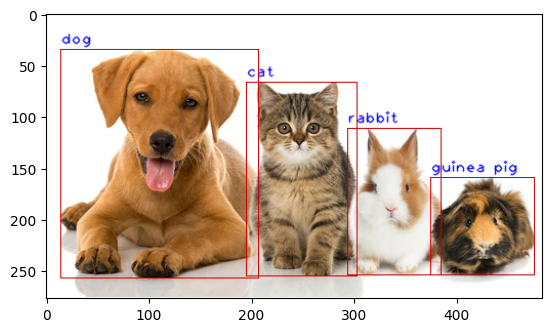

In [20]:
# Get image info
for image_json in images_info:
    
    # Get details
    image_id = image_json['id']
    file_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    #print(image_id, file_name, image_width, image_height)
    
    # Read images
    image_path = os.path.join('./data/', file_name)
    #print(image_path)
    image = cv2.imread(image_path)
    #print(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get bounding boxes
    for anno_json in annotations_info:
        if image_id == anno_json['image_id']:
            #################
            # Get positions of bounding boxes
            bbox = anno_json['bbox']  # x, y, w, h
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            #print(x, y, w, h)
            
            # Draw rectangles
            cv2.rectangle(image, (x, y), (x+w, y+h), (205, 0, 0), 1)
            
            #################
            # Display labels
            category_id = anno_json['category_id']
            #print(category_id)
            
            # Get label names
            label_name = label_dict[category_id]
            #print(label_name)
            
            # Display labels
            image = cv2.putText(image, label_name, (x, y-5), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1, cv2.LINE_AA)
    plt.imshow(image)
    plt.show()